In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("cleaned_google_playstore_data.csv")

In [7]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [8]:
df = data.copy()

In [9]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,NaN,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,NaN,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,NaN,NaN,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,NaN,NaN,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,NaN,NaN,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0,1,6,2018


In [13]:
for col in df.columns:
    print(f"Number duplicated of {col}: {len(df[df[col].duplicated()])}")
    

Number duplicated of App: 1181
Number duplicated of Category: 10807
Number duplicated of Rating: 10800
Number duplicated of Reviews: 4839
Number duplicated of Size: 10380
Number duplicated of Installs: 10820
Number duplicated of Type: 10837
Number duplicated of Price: 10748
Number duplicated of Content Rating: 10834
Number duplicated of Genres: 10721
Number duplicated of Last Updated: 9463
Number duplicated of Current Ver: 8009
Number duplicated of Android Ver: 10807
Number duplicated of Day: 10809
Number duplicated of Month: 10828
Number duplicated of Year: 10831


In [15]:
df = df.drop_duplicates(subset=["App"], keep="first")

In [16]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,NaN,NaN,19,1,2015


In [56]:
#Now I would like to segregate our data into two different dataframe that one of it is numeric the other one is categoric
#1.Numeric dataframe columns
numeric_feature = [feature for feature in df.columns if df[feature].dtype!="O"]

In [57]:
numeric_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [58]:
#our numeric dataframe
numeric_data = df[numeric_feature]
numeric_data

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


In [59]:
#2.Categorical dataframe columns
categorical_feature = [feature for feature in df.columns if df[feature].dtype=="O"]

In [60]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [61]:
categorical_data = df[categorical_feature]
categorical_data

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,NaN,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,NaN,NaN


In [39]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018


In [40]:
df["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [41]:
#show percentage of type instances
df["Type"].value_counts(normalize=True)*100

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

In [42]:
def percentage_of_group(dataframe):
    for col in dataframe.columns:
        print(col)
        print(f"{dataframe[col].value_counts(normalize=True)*100}")
        print("=============================================")

In [62]:
percentage_of_group(categorical_data)

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
S

<AxesSubplot:xlabel='Type', ylabel='count'>

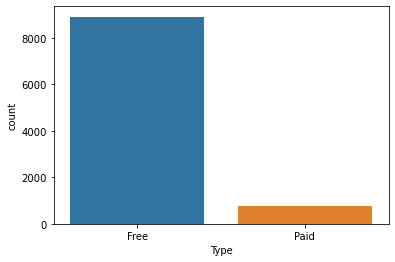

In [46]:
sns.countplot(x=df["Type"])

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

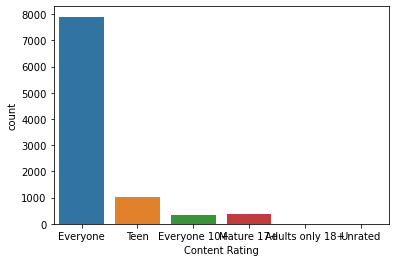

In [49]:
sns.countplot(x=df["Content Rating"])

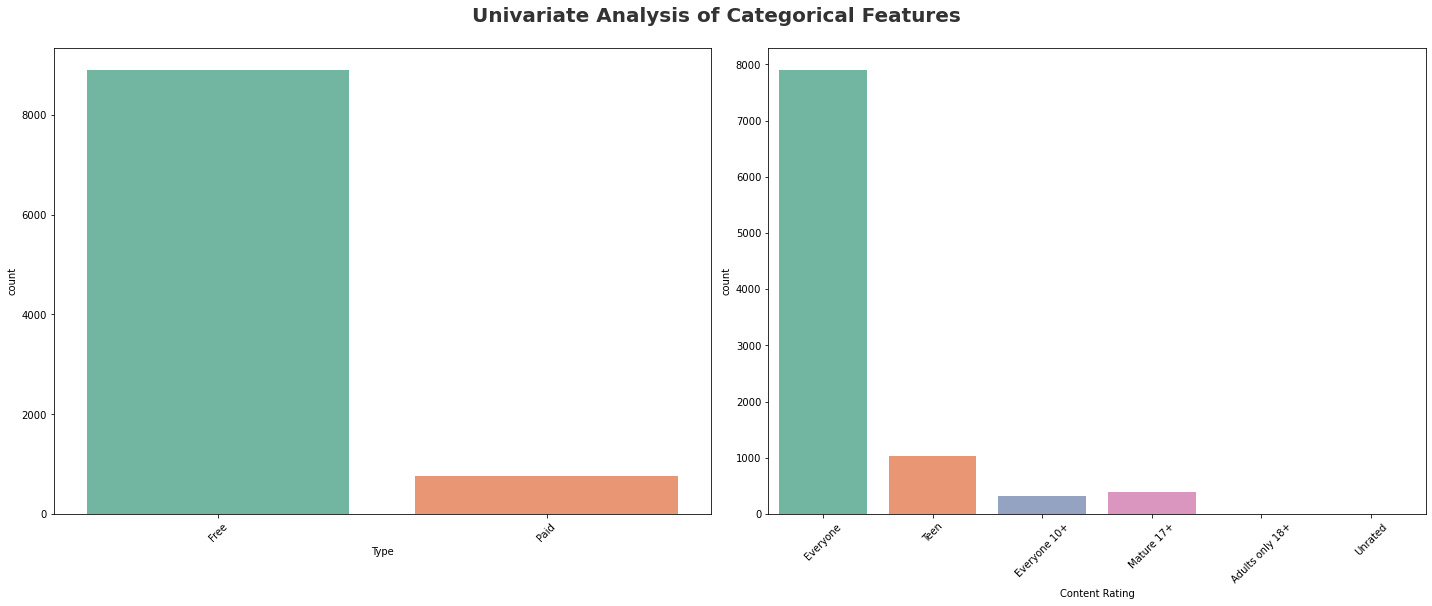

In [50]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

In [63]:
#Visualization for numeric features
numeric_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

<AxesSubplot:xlabel='Price', ylabel='Density'>

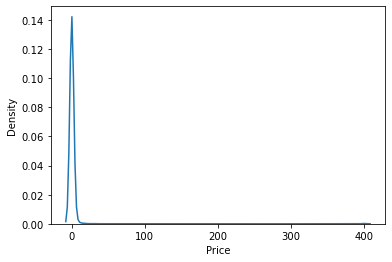

In [69]:
#check the distrubution of Price feature
sns.kdeplot(numeric_data['Price'])

/Users/neseuygun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

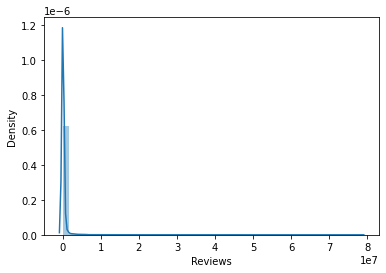

In [68]:
sns.distplot(numeric_data['Reviews'])

/Users/neseuygun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

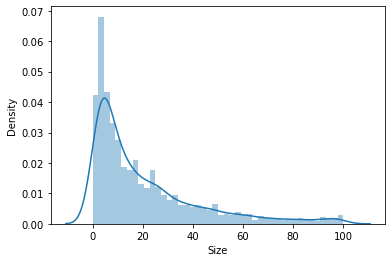

In [70]:
#We can see size feature has right skewness
sns.distplot(numeric_data["Size"])

/Users/neseuygun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

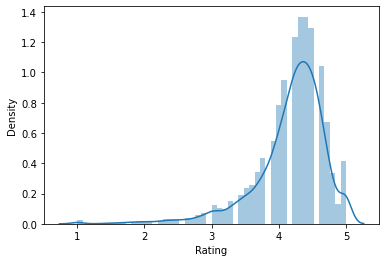

In [73]:
#check distribution of Rating feature with seaborn
sns.distplot(df['Rating'])

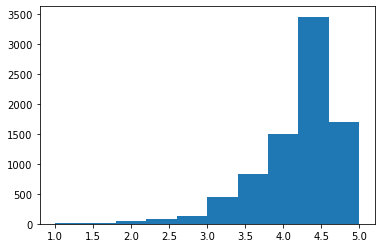

In [74]:
#check distribution of Rating feature with pyplot
plt.hist(df["Rating"])
plt.show()

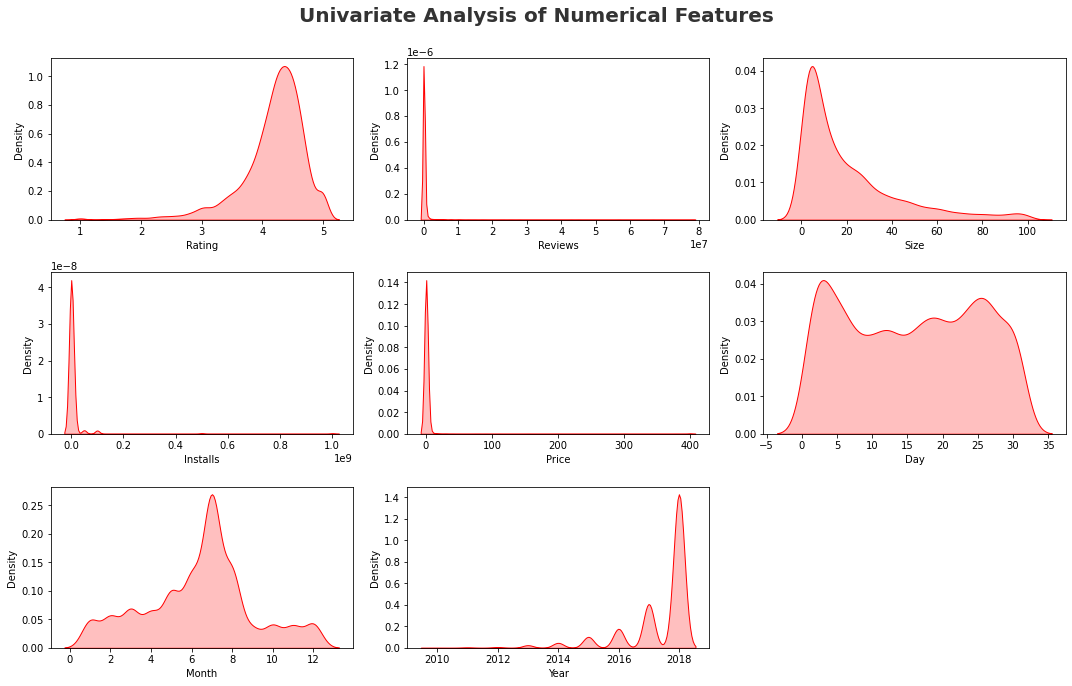

In [83]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_feature[i]],shade=True, color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

<AxesSubplot:ylabel='Category'>

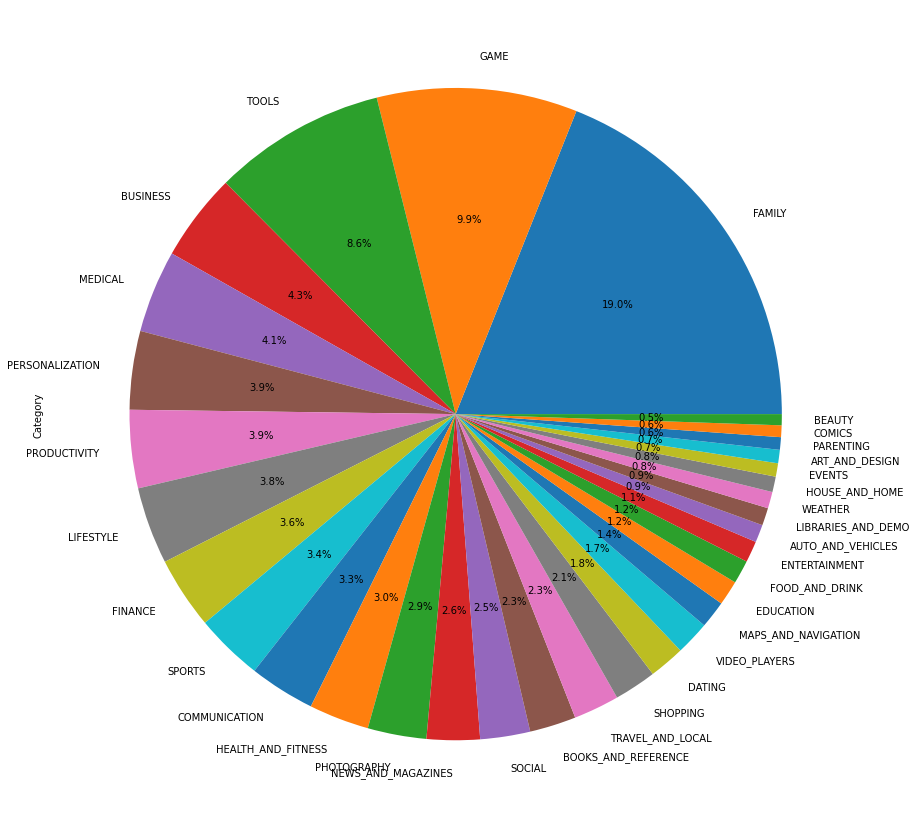

In [84]:
df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(15,15),autopct='%1.1f%%')

In [113]:
#Visualize top 10 category
df_cat=df["Category"].value_counts()[:10]

In [114]:
df_category = pd.DataFrame(df["Category"].value_counts())
df_category.rename(columns = {'Category':'Count'},inplace=True)

In [115]:
df_category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


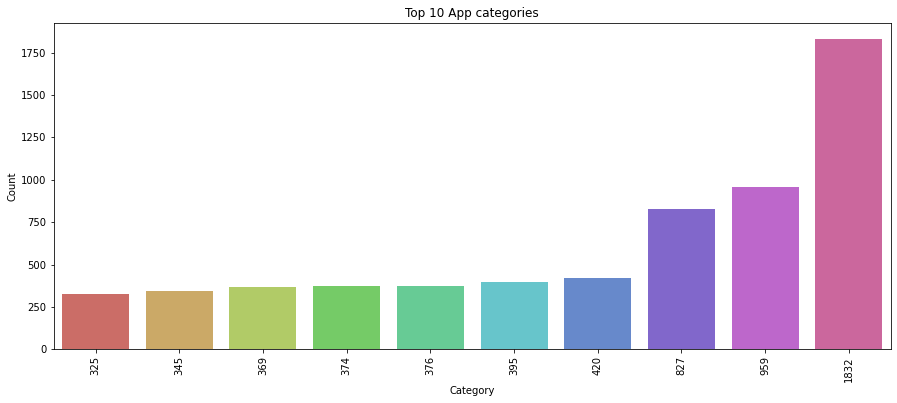

In [119]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_cat, y ='Count',data = df_category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [120]:
#Lets do some features univarite(single), bivariate(2 variable) and multivariate analysis(2+ variable)
#which category having largest number of installaion?
#This is a univarite analysis
#category is a categorical feature and installaion is numeric feature

In [133]:
df_cat_installs=df.groupby(["Category"]).agg({"Installs":"sum"}).sort_values(by="Installs",ascending=False).reset_index()[:10]

In [134]:
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<AxesSubplot:xlabel='Installs', ylabel='Category'>

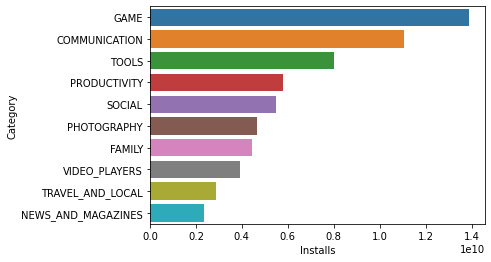

In [135]:
sns.barplot(x="Installs",y="Category",data=df_cat_installs)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

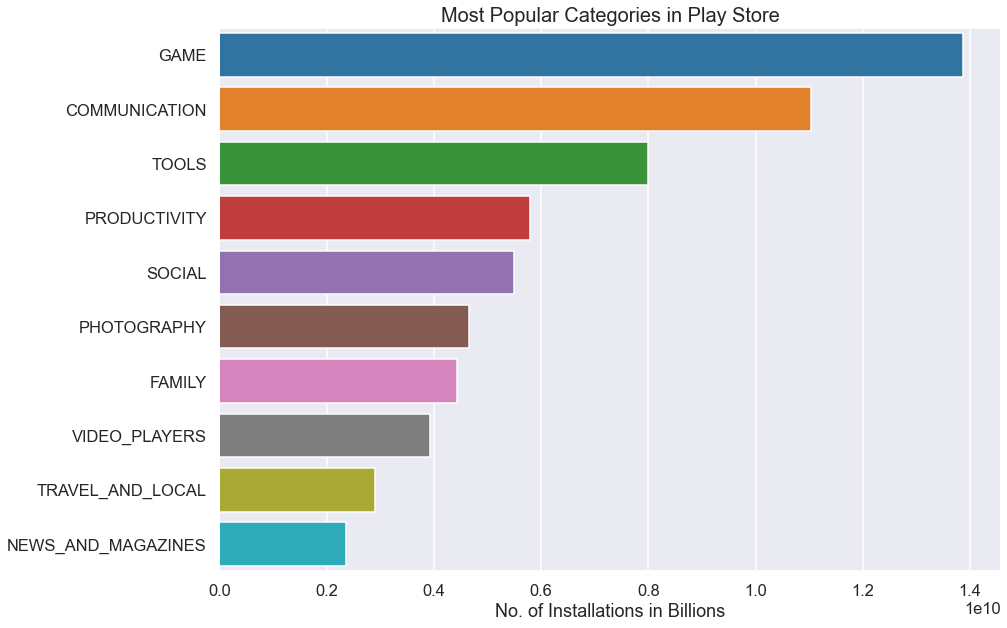

In [137]:
#Let's get more beautifull graph
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df_cat_installs )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## What are the Top 5 most installed Apps in Each popular Categories ?

In [147]:
df_app = df.groupby(["Category", "App"])["Installs"].sum().sort_values(ascending=False).reset_index()

In [148]:
df_app

,Category,App,Installs
0,TRAVEL_AND_LOCAL,Google Street View,1000000000
1,NEWS_AND_MAGAZINES,Google News,1000000000
2,COMMUNICATION,Skype - free IM & video calls,1000000000
3,VIDEO_PLAYERS,YouTube,1000000000
4,COMMUNICATION,WhatsApp Messenger,1000000000
...,...,...,...
9654,TRAVEL_AND_LOCAL,EG | Explore Folegandros,0
9655,MEDICAL,EP Cook Book,0
9656,FINANCE,Eu sou Rico,0
9657,FAMILY,Ain Arabic Kids Alif Ba ta,0


In [149]:
df_app[df_app.Category=='GAME'][:5]

,Category,App,Installs
17,GAME,Subway Surfers,1000000000
22,GAME,Candy Crush Saga,500000000
28,GAME,Pou,500000000
30,GAME,Temple Run 2,500000000
36,GAME,My Talking Tom,500000000


In [151]:
df_app[df_app.Category=='PRODUCTIVITY'][:5]

,Category,App,Installs
18,PRODUCTIVITY,Google Drive,1000000000
38,PRODUCTIVITY,Microsoft Word,500000000
39,PRODUCTIVITY,Google Calendar,500000000
40,PRODUCTIVITY,Dropbox,500000000
41,PRODUCTIVITY,Cloud Print,500000000


In [152]:
df_app[df_app.Category=='FAMILY'][:5]

,Category,App,Installs
49,FAMILY,Tom Loves Angela,100000000
81,FAMILY,Talking Tom Cat 2,100000000
95,FAMILY,Bitmoji – Your Personal Emoji,100000000
103,FAMILY,Talking Tom Cat,100000000
105,FAMILY,Talking Tom & Ben News,100000000


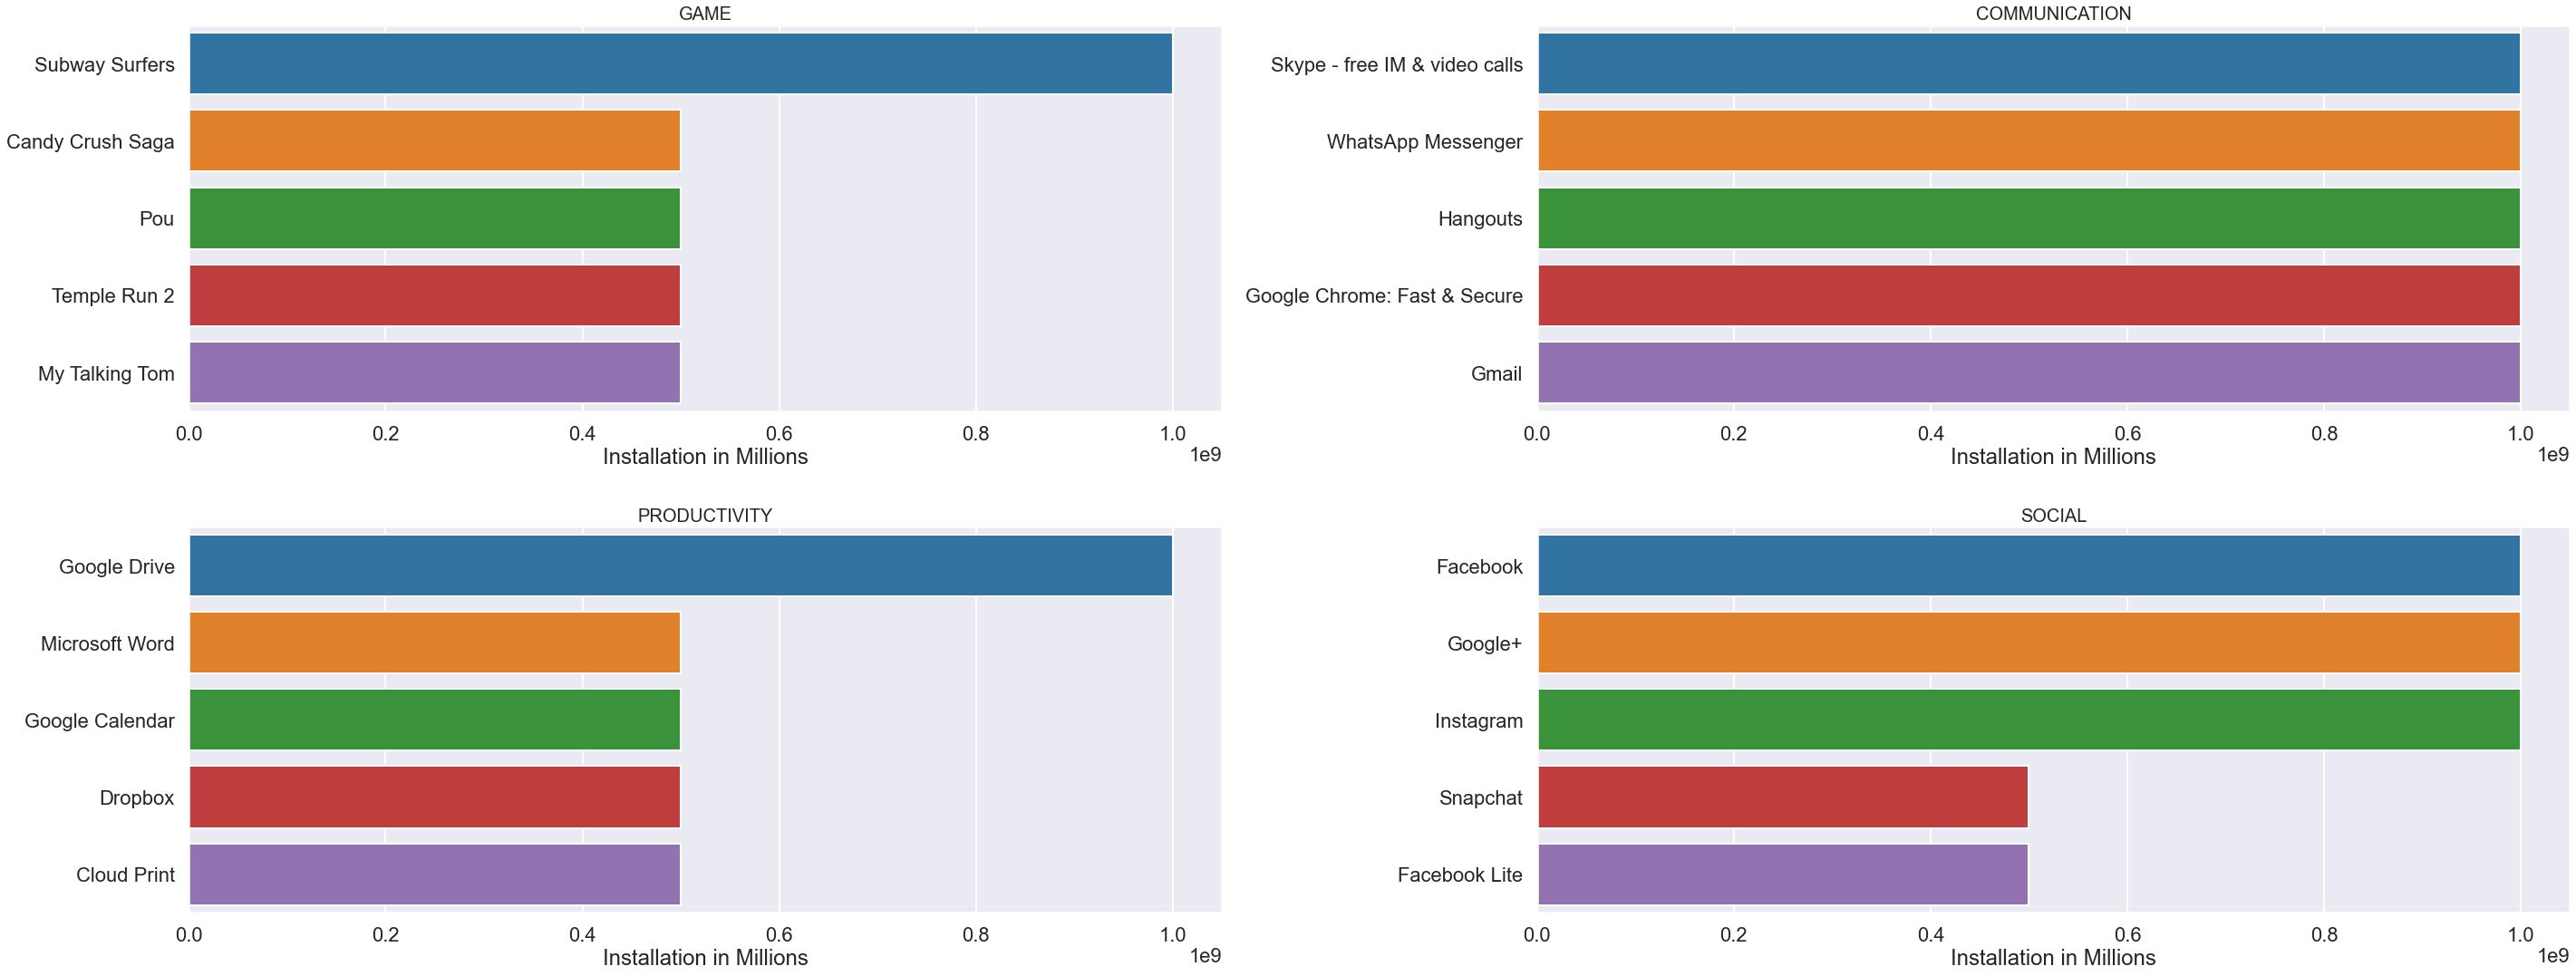

In [158]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = df_app[df_app.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## How many apps are there on google play store which get 5 rating?

In [175]:
df.App[df["Rating"]==5]

329                    Hojiboy Tojiboyev Life Hacks
612                   American Girls Mobile Numbers
615                                    Awake Dating
633                           Spine- The dating app
636      Girls Live Talk - Free Text and Video Chat
                            ...                    
10720                             Mad Dash Fo' Cash
10741                         GKPB FP Online Church
10775                              Monster Ride Pro
10819                               Fr. Daoud Lamei
10836              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 271, dtype: object

In [176]:
len(df.App[df["Rating"]==5])

271

## Which category app users are reviewing most?

In [211]:
df2 = df.groupby(["Category"])["Reviews"].max().sort_values(ascending=False)

In [193]:
df2["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

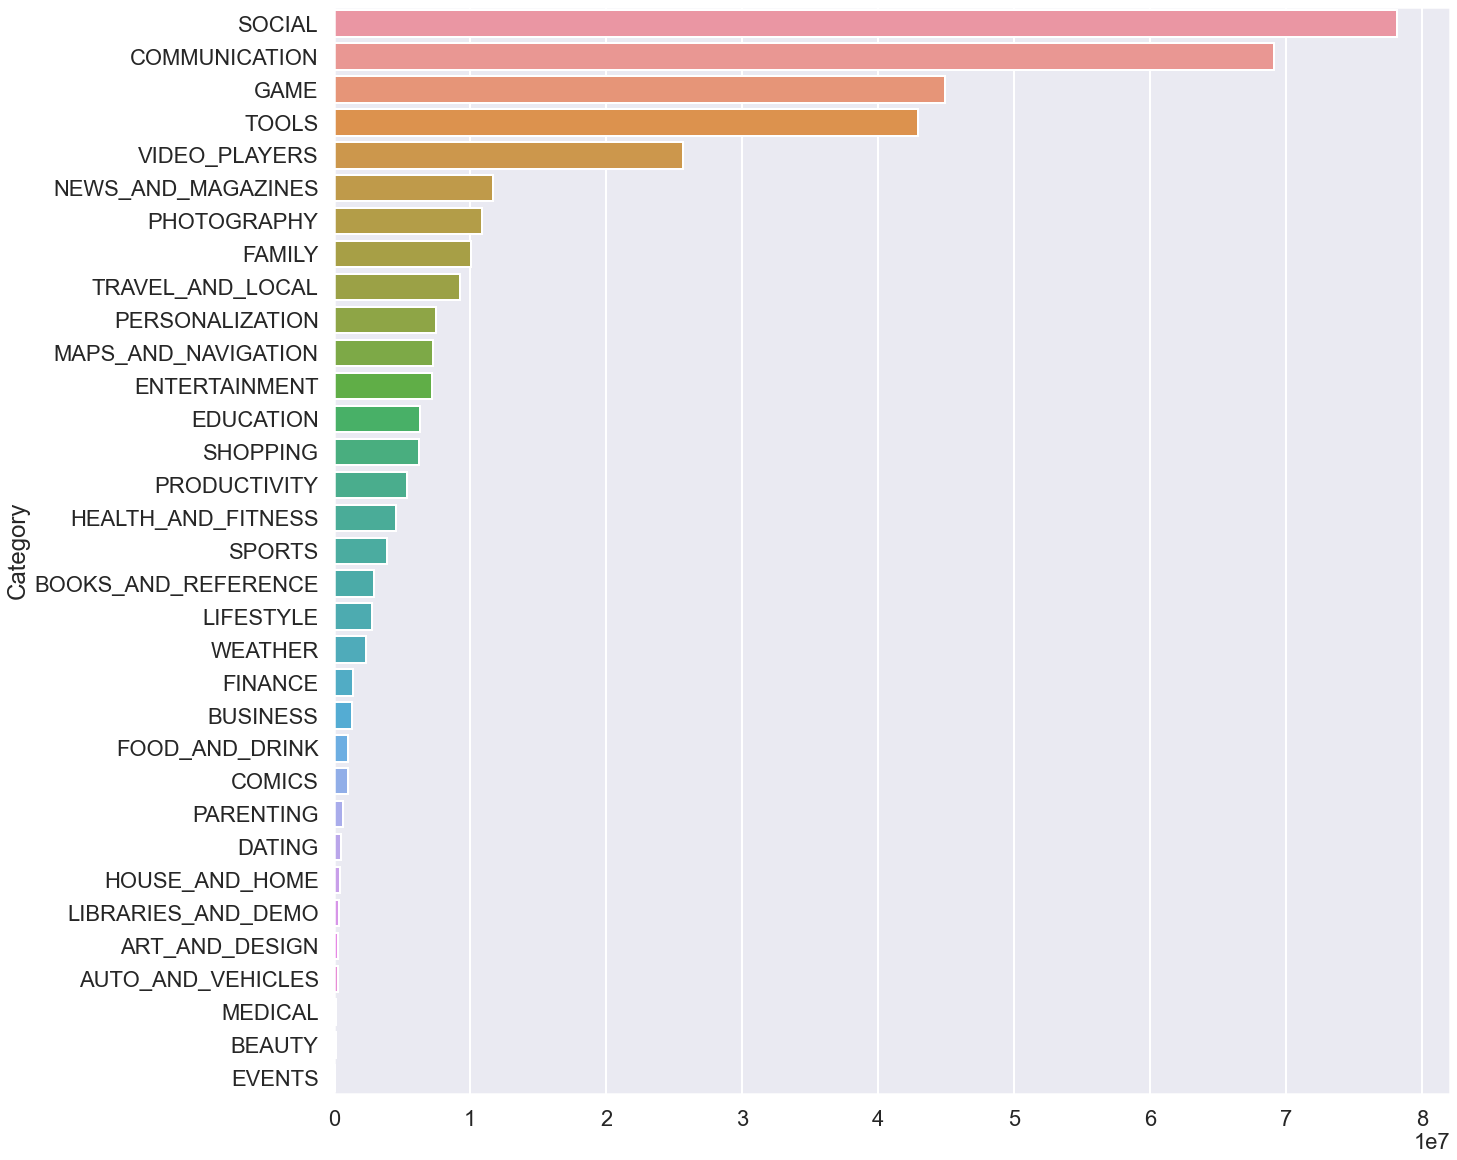

In [215]:
plt.figure(figsize=(20,20))
sns.barplot(x=df2.values, y=df2.index)
plt.show()

In [226]:
df3 = df.groupby(["Category","App"])["Reviews"].sum().reset_index().sort_values(by="Reviews",ascending=False)

In [227]:
df3

,Category,App,Reviews
7883,SOCIAL,Facebook,78158306
1181,COMMUNICATION,WhatsApp Messenger,69119316
7919,SOCIAL,Instagram,66577313
1099,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847
4191,GAME,Clash of Clans,44891723
...,...,...,...
5497,LIFESTYLE,DT,0
8412,TOOLS,AQ SMS Notify,0
8413,TOOLS,AQ wisdom +,0
402,BOOKS_AND_REFERENCE,Schlaumeier,0


In [223]:
df3[df3["Category"]=="SOCIAL"].sort_values(by="Reviews",ascending=False)

,Category,App,Reviews
7883,SOCIAL,Facebook,78158306
7919,SOCIAL,Instagram,66577313
7984,SOCIAL,Snapchat,17014787
7885,SOCIAL,Facebook Lite,8606259
8015,SOCIAL,VK,5793284
...,...,...,...
7963,SOCIAL,Pekalongan CJ,0
8041,SOCIAL,quran-DZ,0
7976,SOCIAL,Rejoin Your Ex,0
7838,SOCIAL,C.P. CERVANTES (TOBARRA),0


## Which category has the largest size?

In [235]:
df_new = df.groupby(["Category"])["Size"].mean().reset_index().sort_values(by="Size",ascending=False)

In [236]:
df_new

,Category,Size
14,GAME,41.866609
11,FAMILY,27.187988
30,TRAVEL_AND_LOCAL,24.146665
28,SPORTS,23.988256
9,ENTERTAINMENT,23.043750
22,PARENTING,22.512963
15,HEALTH_AND_FITNESS,20.669707
13,FOOD_AND_DRINK,20.494318
1,AUTO_AND_VEHICLES,20.037147
20,MEDICAL,19.162253


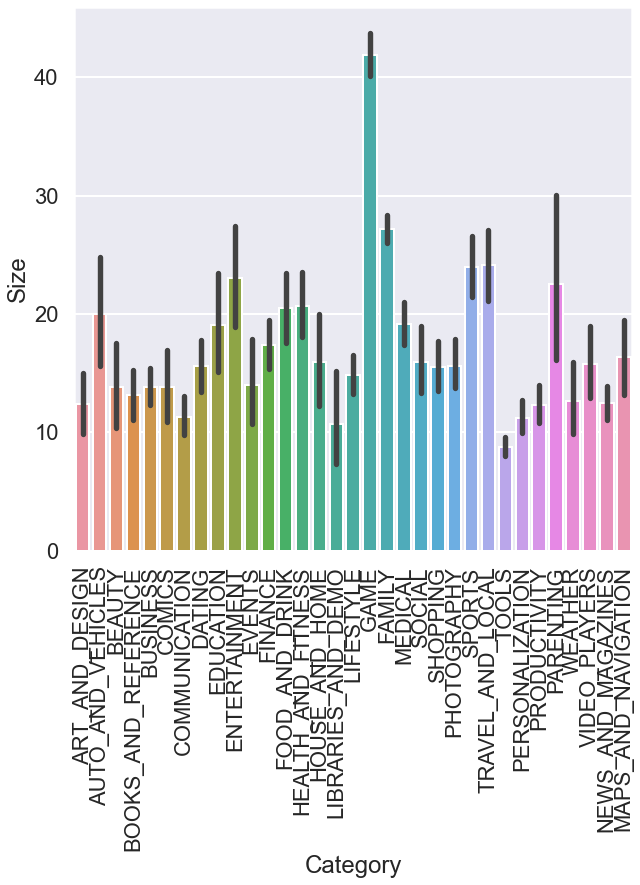

In [245]:
plt.figure(figsize=(10,10))
sns.barplot(x="Category",y="Size",data=df)
plt.xticks(rotation=90)
plt.show()

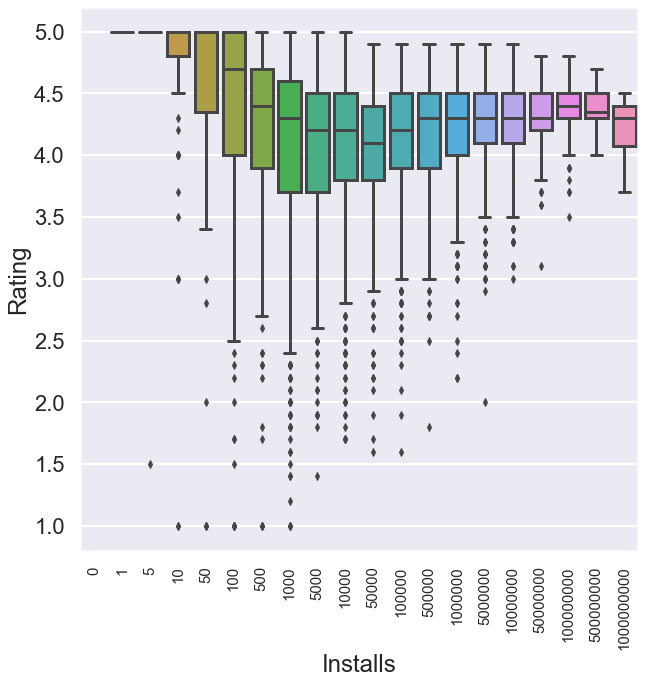

In [244]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Installs",y="Rating",data=df)
plt.xticks(size=15,rotation=90)
plt.show()

/var/folders/hq/f4fnfxxj0psb8f_l4kc58_tr0000gn/T/ipykernel_7608/3403929861.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  freq= pd.Series()


Text(0.5, 1.0, 'Time series plot of Last Updates')

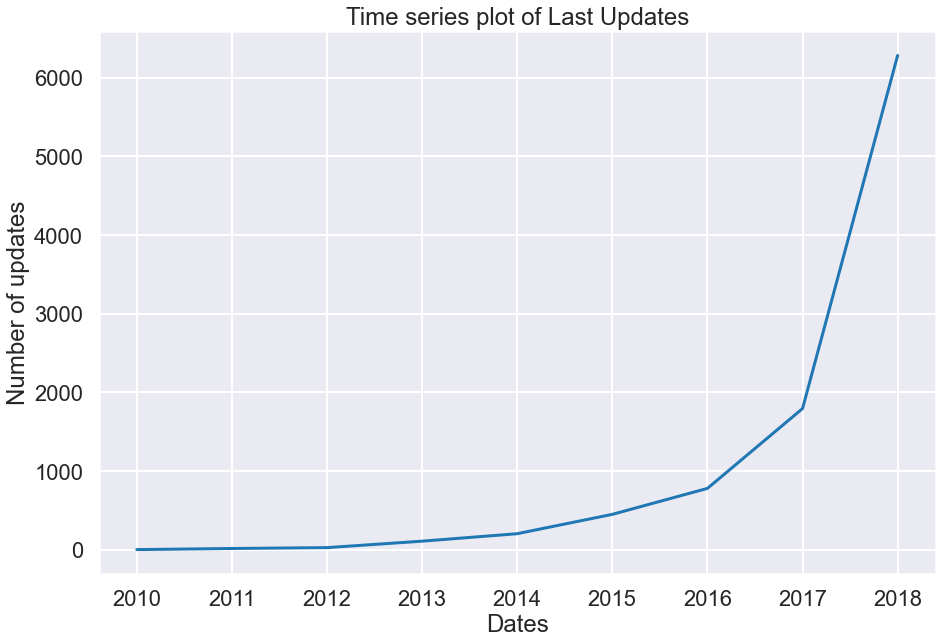

In [249]:
plt.subplots(figsize=(15,10))
freq= pd.Series()
freq=df['Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

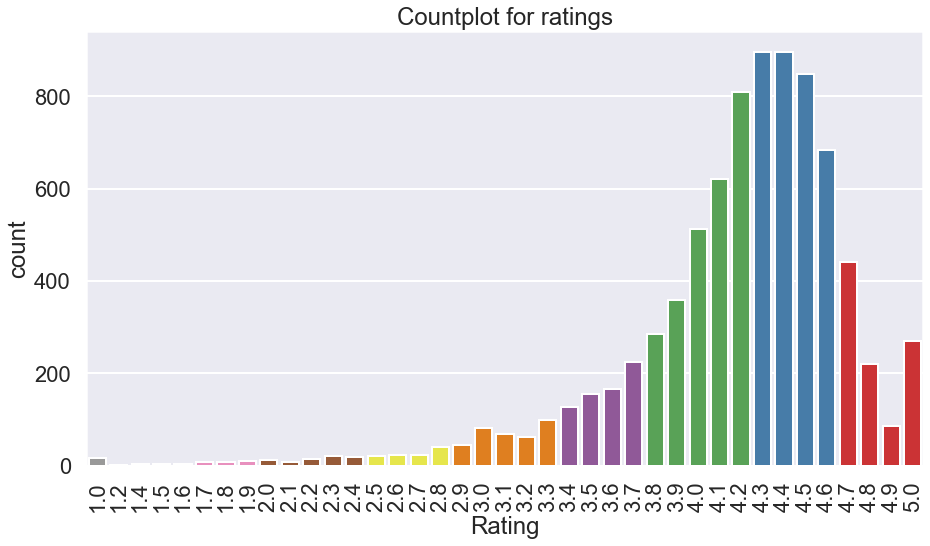

In [250]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = df,palette="Set1_r")
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()